In [1]:
import sys
sys.path.append("..")
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
# %matplotlib inline
import pprint
pp = pprint.PrettyPrinter(indent=4)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


  0%|          | 0/2 [00:00<?, ?it/s]

Pareto: 3 optimal values, 3 objects
       key     A     B     a     b    Ri     L         Req     alpha_i  \
0  G0_C1_P  62.0  74.0  15.0  15.0  72.5  93.5  174.812461  114.818184   
1  G0_C2_P  38.0  50.0  25.0  25.0  77.5  93.5  183.668041  119.362713   
2  G0_C4_P  26.0  26.0  35.0  35.0  62.5  93.5  182.457883  114.271532   

      alpha_o  ...  Bpk/Eacc [mT/MV/m]  E[Epk/Eacc []]  std[Epk/Eacc []]  \
0  114.818184  ...            4.733058        2.316557          0.029843   
1  119.362713  ...            5.488757        1.998139          0.006554   
2  114.271532  ...            5.551101        1.848851          0.023281   

   E[Epk/Eacc []] + 6*std[Epk/Eacc []]  E[Bpk/Eacc [mT/MV/m]]  \
0                             2.495616               4.640008   
1                             2.037463               5.342699   
2                             1.988538               5.495273   

   std[Bpk/Eacc [mT/MV/m]]  E[Bpk/Eacc [mT/MV/m]] + 6*std[Bpk/Eacc [mT/MV/m]]  \
0                 0.

D:\Dropbox\cavsim2d\notebooks\..\cavsim2d\cavity.py:579: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ng = pd.concat([df_cross, df_mutation, df_chaos], ignore_index=True)


Pareto: 5 optimal values, 5 objects
        key     A     B     a     b    Ri     L         Req     alpha_i  \
0  G0_C0_CO  44.0  38.0  25.0  30.0  77.5  93.5  177.900524  116.723448   
1  G0_C3_CO  32.0  50.0  20.0  20.0  70.0  93.5  185.922880  120.380051   
2   G0_C1_P  62.0  74.0  15.0  15.0  72.5  93.5  174.812461  114.818184   
3   G0_C4_P  26.0  26.0  35.0  35.0  62.5  93.5  182.457883  114.271532   
4  G0_C1_CO  44.0  62.0  20.0  30.0  70.0  93.5  181.067440  119.617575   
5  G0_C2_CO  44.0  50.0  25.0  20.0  70.0  93.5  177.627508  114.634955   
6   G0_C2_P  38.0  50.0  25.0  25.0  77.5  93.5  183.668041  119.362713   
7  G0_C4_CO  50.0  50.0  30.0  25.0  77.5  93.5  175.856260  110.463095   

      alpha_o  ...  Bpk/Eacc [mT/MV/m]  E[Epk/Eacc []]  std[Epk/Eacc []]  \
0  116.723448  ...            5.209474        2.030288          0.016746   
1  120.380051  ...            5.383341        1.951732          0.010273   
2  114.818184  ...            4.733058        2.316557      

D:\Dropbox\cavsim2d\notebooks\..\cavsim2d\cavity.py:579: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ng = pd.concat([df_cross, df_mutation, df_chaos], ignore_index=True)


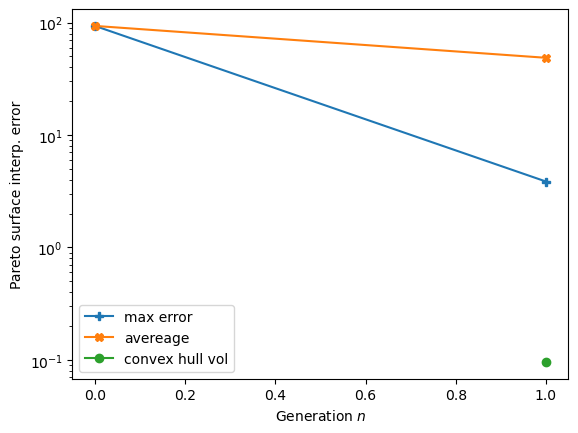

In [2]:
cavs = Cavities([])
# must first save cavities
cavs.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')
cell_type = 'end-end-cell'
optimisation_config = {
    'initial_points': 5,
    'method': {
        'LHS': {'seed': 5},
        # 'Sobol Sequence': {'index': 2},
        # 'Random': {},
        # 'Uniform': {},
        },
    # 'mid-cell': [1, 2, 3, 3, 6, 5, 2],  # must enter if mid-end cell selected
    'tune_config': {
        'freqs': 801.58,
        'parameters': 'Req',
        'cell_types': cell_type,
        'processes': 1
    },
    'wakefield_config': {},
    'optimisation by': 'pareto',
    'crossover_factor': 5,
    'elites_for_crossover': 2,
    'mutation_factor': 5,
    'chaos_factor': 5,
    'processes': 3,
    'no_of_generation': 2,
    'bounds': {'A': [20.0, 80.0],
               'B': [20.0, 80.0],
               'a': [10.0, 60.0],
               'b': [10., 60.0],
               'Ri': [60.0, 85.0],
               'L': [93.5, 93.5],
               'Req': [170.0, 170.0]},
    'objectives': [
        # ['equal', 'freq [MHz]', 801.58],
                      ['min', 'Epk/Eacc []'],
                      ['min', 'Bpk/Eacc [mT/MV/m]'],
                      # ['min', 'ZL', [1, 2, 5]],
                  ],
    'weights': [1, 1],
    'uq_config': {
        'processes': 5,
        'variables': ['A', 'a'],
        'delta': [0.05, 0.05],
        'distribution': 'gaussian',
        # 'method': ['QMC', 'LHS', 1000],
        # 'method': ['QMC', 'Sobol', 1000],
        # 'method': ['Qudrature', 'Gaussian', 1000],
        'method': ['Quadrature', 'Stroud3'],
        # 'method': ['Quadrature', 'Stroud5'],
        # 'gaussian': ['Quadrature', 'Gaussian'],
        # 'from file': ['<file path>', columns],
        'cell type': cell_type
        }
}
cavs.run_optimisation(optimisation_config)